In [1]:
import pandas as pd
df=pd.read_csv('TATA MOTORS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-12-25,72.819626,72.819626,72.819626,72.819626,53.306633,0.0
1,1995-12-26,72.819626,72.819626,72.819626,72.819626,53.306633,0.0
2,1995-12-27,72.819626,72.819626,72.819626,72.819626,53.306633,0.0
3,1995-12-28,72.819626,72.819626,72.819626,72.819626,53.306633,0.0
4,1995-12-29,72.819626,72.819626,72.819626,72.819626,53.306633,0.0
...,...,...,...,...,...,...,...
6971,2023-09-04,615.599976,615.599976,606.000000,609.000000,609.000000,8392665.0
6972,2023-09-05,610.000000,618.900024,608.049988,611.150024,611.150024,8560651.0
6973,2023-09-06,611.150024,612.549988,605.599976,610.250000,610.250000,6520064.0
6974,2023-09-07,610.900024,616.500000,609.049988,614.900024,614.900024,6520293.0


In [2]:
df=df[['Date','Close']]

df

,Date,Close
0,1995-12-25,72.819626
1,1995-12-26,72.819626
2,1995-12-27,72.819626
3,1995-12-28,72.819626
4,1995-12-29,72.819626
...,...,...
6971,2023-09-04,609.000000
6972,2023-09-05,611.150024
6973,2023-09-06,610.250000
6974,2023-09-07,614.900024


In [3]:
df['Date']

0       1995-12-25
1       1995-12-26
2       1995-12-27
3       1995-12-28
4       1995-12-29
           ...    
6971    2023-09-04
6972    2023-09-05
6973    2023-09-06
6974    2023-09-07
6975    2023-09-08
Name: Date, Length: 6976, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day =int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1999-03-11')
datetime_object

datetime.datetime(1999, 3, 11, 0, 0)

In [5]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\Naganani\AppData\Local\Temp\ipykernel_3688\1876721881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0      1995-12-25
1      1995-12-26
2      1995-12-27
3      1995-12-28
4      1995-12-29
          ...    
6971   2023-09-04
6972   2023-09-05
6973   2023-09-06
6974   2023-09-07
6975   2023-09-08
Name: Date, Length: 6976, dtype: datetime64[ns]

In [6]:
df.index=df.pop('Date')
df

,Close
Date,
1995-12-25,72.819626
1995-12-26,72.819626
1995-12-27,72.819626
1995-12-28,72.819626
1995-12-29,72.819626
...,...
2023-09-04,609.000000
2023-09-05,611.150024
2023-09-06,610.250000


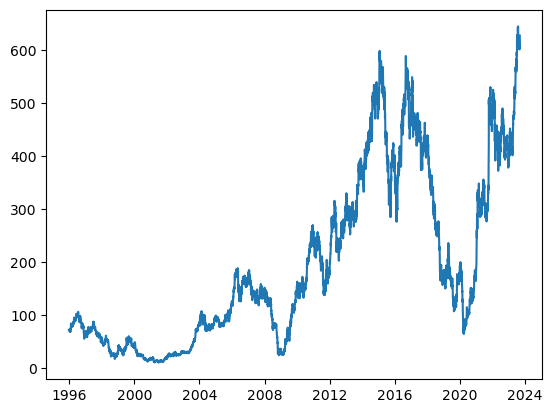

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [8]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1999-03-17', 
                                '2023-09-08', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1999-03-17,35.739105,35.547478,34.397694,33.822800
1,1999-03-18,35.547478,34.397694,33.822800,33.516190
2,1999-03-19,34.397694,33.822800,33.516190,32.883808
3,1999-03-22,33.822800,33.516190,32.883808,32.098125
4,1999-03-23,33.516190,32.883808,32.098125,34.665974
...,...,...,...,...,...
6129,2023-09-04,605.549988,601.000000,611.200012,609.000000
6130,2023-09-05,601.000000,611.200012,609.000000,611.150024
6131,2023-09-06,611.200012,609.000000,611.150024,610.250000
6132,2023-09-07,609.000000,611.150024,610.250000,614.900024


In [9]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((6134,), (6134, 3, 1), (6134,))

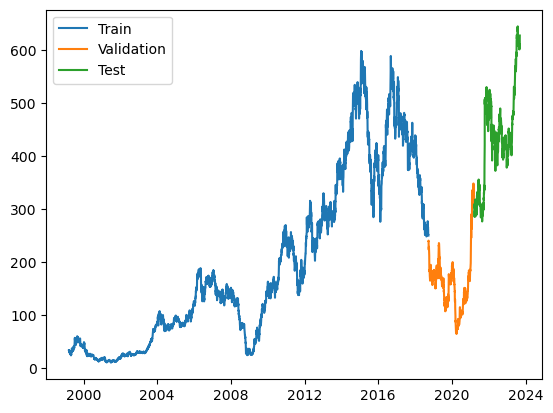

In [10]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
154/154 [==============================] - 10s 21ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/100
154/154 [==============================] - 2s 11ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/100
154/154 [==============================] - 2s 11ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/100
154/154 [==============================] - 2s 10ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/100
154/154 [==============================] - 2s 10ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/100
154/154 [==============================] - 1s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/100
154/154 [==============================] - 1s 8ms/step - loss: n

154/154 [==============================] - 2s 5ms/step


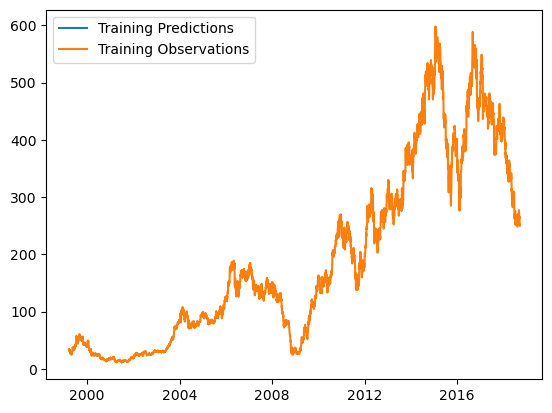

In [12]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

20/20 [==============================] - 0s 4ms/step


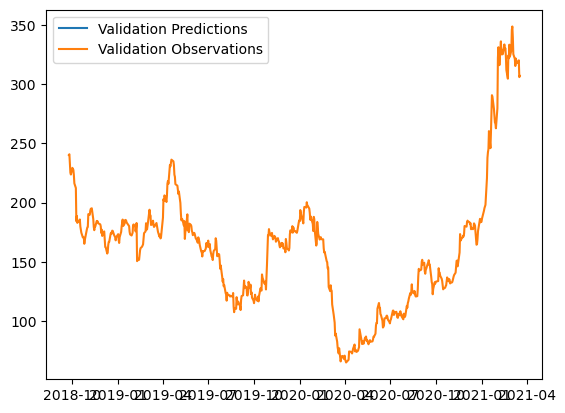

In [13]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

20/20 [==============================] - 0s 5ms/step


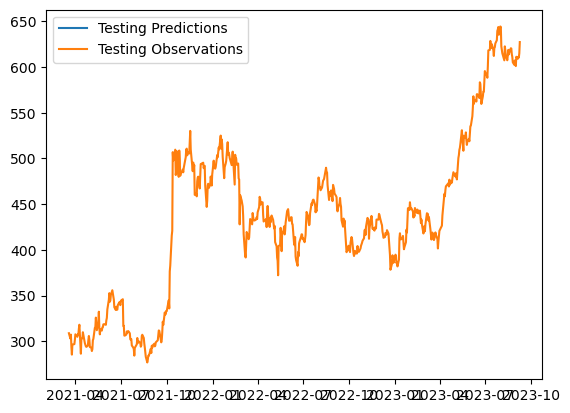

In [14]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])


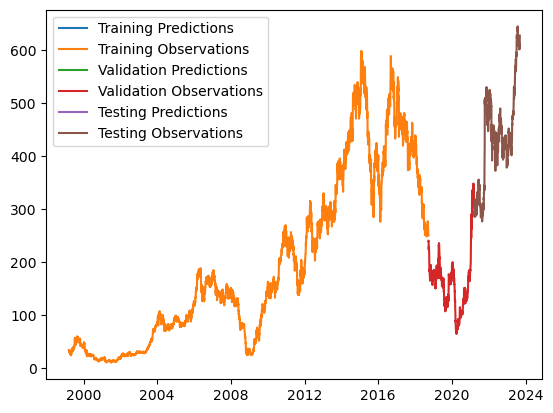

In [15]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [16]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 62ms/step


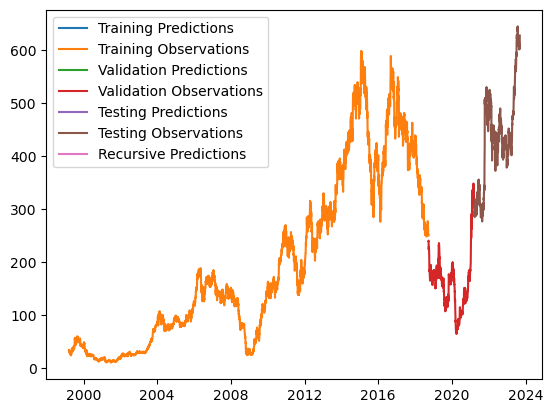

In [17]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])